How to Update Repository:
git for version control so whenever you work on this to be up to date with any changes,

git pull

Once you're done working on a portion, to keep up-to-date,

git add .
git commit -m "your message"
git push


### What is Richardson Extrapolation  
Richardson extrapolation is a technique for taking two numerical approximations (for example two integral approximations) with different step sizes and using that to cancel out the leading error term.  

We can view most integral approximations to be  
$A(h)\approx I + E$  
$E = Ch^p + C_{2}h^{p_2} + ... + C_{n}h^{p_n}$  
Where A is the approximation function, h is the step size, I is the integral, and E is the error  
The goal is to combine $A(h)$ and a reduced step size such as $A(\frac{h}{2})$ in such a way that $Ch^p$ is eliminated and a new more accurate approximation is defined  


#### In the case of the trapezoid rule  
$A(h)\approx I + Ch^p + C_{2}h^4 + C_{2}h^6 + ...$  
And now if we halve the step size  
$A(\frac{h}{2})\approx I + C(\frac{h}{2})^p + C_{2}(\frac{h}{2})^4 + C_{3}(\frac{h}{2})^6 + ...$  

To compute Richardson Extrapolation, we define a new function R with weights $\alpha$ and $\beta$  
$R = \alpha A(\frac{h}{2}) + \beta A(h)$  
$\alpha + \beta = 1$  
We cancel the leading coefficient  
$\alpha(Ch^2)(\frac{1}{4} + \beta (Ch^2) = 0$
Solving the system, we determine  
$\alpha = \frac{4}{3} \text{ and }\beta = \frac{-1}{3}$  
Such that  
$R = \frac{4}{3} A(\frac{h}{2}) + \frac{-1}{3} A(h)$  
Which brings the leading error coefficient from $h^2$ down to $h^4$ (we know error is < 0 hence leading is the smaller power) 
#### Generalized formula and Table
The same process repeats for determining the rest of the extrapolations, but luckily there's a generalized formula  
\begin{align}
    R_{k, j}=R_{k, j-1} + \frac{1}{4^{j-1} - 1}(R_{k, j-1} - R_{k-1,j-1}).
\end{align}  
With an extrapolation table like this  
| Level | Column 1         | Column 2         | Column 3         |
|-------|------------------|------------------|------------------|
| 1     | R<sub>1,1</sub>  |                  |                  |
| 2     | R<sub>2,1</sub>  | R<sub>2,2</sub>  |                  |
| 3     | R<sub>3,1</sub>  | R<sub>3,2</sub>  | R<sub>3,3</sub>  |
| …     | …                | …                | …                |


### What is Romberg Integration

Romberg integration was developed by Werner Romberg in 1955 to improve the Trapezoid Rule by utilizing Richardson's extrapolation to reduce higher-order error terms. 

We recall the composite Trapezoid rule, given by:
  \begin{align}
      \int_{a}^{b} f(x) dx = \frac{h}{2} \left(f(a) + 2 \sum_{i=1}^{n-1} f(x_i) + f(b)\right) + O(h^2)
  \end{align}
  , where $h=\frac{b-a}{n}$ and $x_i = x_{i-1} + h$.

In Romberg integration, we construct a Romberg table, with each entry denoted as $R_{k,j}$. The subscript $k$ corresponds to there being $2^{k-1}$ subintervals; i.e., $R_{1,1}, R_{2,1}, \dots, R_{k,1}$ correspond to the normal Trapezoid rule with $n=2^{k-1}$ subintervals respectively (no extrapolation).

The subscript $j$ corresponds to the $(j-1)$th level of extrapolation. It is important to note that entries of the Romberg table $R_{k,j}$ require that $k \geq j$. Meaning, $R_{1,1}, R_{2,1}, \dots R_{k, 1}$ exist, but $R_{1,2}, R_{2,3}, \dots, R_{j-1, j}$ do not. We see in the formula below why, but this is mainly because $R_{0, 1}$ does not exist.

The extrapolation formula is given by:
\begin{align}
    R_{k, j}=R_{k, j-1} + \frac{1}{4^{j-1} - 1}(R_{k, j-1} - R_{k-1,j-1}).
\end{align}

Each entry $R_{n,n}$ entry of the Romberg table has error $O(h^{2n})$

### Numeric Example  
$\int_{0}^1 \frac{4}{\sqrt{1+x^2}) dx = \pi = 3.141592653$  

n=1, h=6  
$\frac{1}{2} [f(0) + f(1)] = 3$  
n=2 h=1/2  
$\frac{1}{4} [f(0) + 2(f(1/2)) + f(1)] = 3.1$  
n=4 h=1/8  
$\frac{1}{4} [f(0) + 2(f(1/4) + f(1/2) + f(3/4)) + f(1)] = 3.1311765$  

#### Romberg Table
| Level | Column 1         | Column 2         | Column 3         |
|-------|------------------|------------------|------------------|
| 1     | R<sub>1,1</sub>=3  |                  |                  |
| 2     | R<sub>2,1</sub>=3.1  | R<sub>2,2</sub>  |                  |
| 3     | R<sub>3,1</sub>=3.1311765  | R<sub>3,2</sub>  | R<sub>3,3</sub>  |
| …     | …                | …                | …                |

$T_{2,2} = T_{2,1} + \frac{T_{2,1} + T_{1,1}}{3} = 3.133333$  
$T_{3,2} = T_{3,1} + \frac{T_{3,1} + T_{2,1}}{3} = 3.1415687$  
$T_{3,3} = T_{3,2} + \frac{T_{3,2} + T_{2,2}}{15} = 3.142117647$  
   

| Level | Column 1         | Column 2         | Column 3         |
|-------|------------------|------------------|------------------|
| 1     | R<sub>1,1</sub>=3  |                  |                  |
| 2     | R<sub>2,1</sub>=3.1  | R<sub>2,2</sub>=3.133333  |                  |
| 3     | R<sub>3,1</sub>=3.1311765  | R<sub>3,2</sub>=3.1415687  | R<sub>3,3</sub>= 3.142117647	 |
| …     | …                | …                | …                |

In [14]:
f(x) = 4.0 / (1.0 + x^2)

f (generic function with 1 method)

In [15]:
function romberg(f, a, b; max_k=8)
    T = zeros(Float64, max_k, max_k)
    for k = 1:max_k
        n = 2^(k-1)
        h = (b - a) / n

        s = 0.5 * (f(a) + f(b))
        for i = 1:n-1
            s += f(a + i*h)
        end
        T[k,1] = h * s
    end

    for j = 2:max_k
        for k = j:max_k
            T[k,j] = T[k,j-1] + (T[k,j-1] - T[k-1,j-1]) / (4^(j-1) - 1)
        end
    end

    return T
end

function print_romberg(T; sig=10)
    rows, cols = size(T)
    for i = 1:rows
        for j = 1:i
            @printf("%.*g\t", sig, T[i,j]) 
        end
        println()
    end
end

# Example usage

T = romberg(f, 0, 1, max_k=8)
print_romberg(T, sig=10)

3	
3.1	3.133333333	
3.131176471	3.141568627	3.142117647	
3.138988494	3.141592502	3.141594094	3.141585784	
3.140941612	3.141592651	3.141592661	3.141592638	3.141592665	
3.141429893	3.141592654	3.141592654	3.141592654	3.141592654	3.141592654	
3.141551963	3.141592654	3.141592654	3.141592654	3.141592654	3.141592654	3.141592654	
3.141582481	3.141592654	3.141592654	3.141592654	3.141592654	3.141592654	3.141592654	3.141592654	


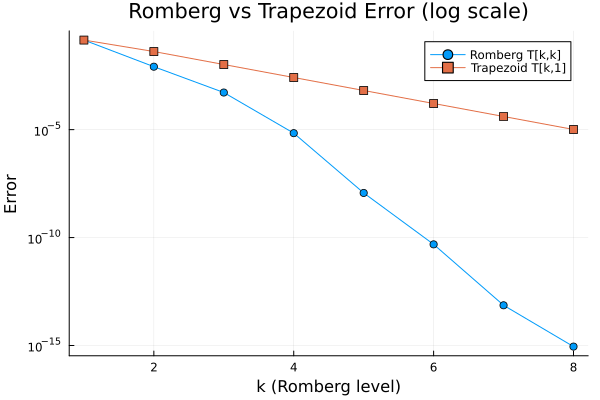

In [16]:
using Plots

function romberg_error_plot(f, a, b, exact; max_k=8)
    romberg_errors = Float64[]
    trap_errors = Float64[]

    for k = 1:max_k
        T = romberg(f, a, b, max_k=k)
        approx_romberg = T[k,k]
        push!(romberg_errors, abs(approx_romberg - exact))
        approx_trap = T[k,1]
        push!(trap_errors, abs(approx_trap - exact))
    end

    plot(
        1:max_k, romberg_errors,
        xlabel="k (Romberg level)",
        ylabel="Error",
        yscale=:log10,
        markershape=:circle,
        label="Romberg T[k,k]",
        title="Romberg vs Trapezoid Error (log scale)"
    )

    plot!(1:max_k, trap_errors,
        markershape=:square,
        label="Trapezoid T[k,1]")
end

romberg_error_plot(f,0,1,pi)